# Tolerance of network feature
In this tutorial, we will understand how to build a code that reports the changes in the network features implemented in ['graph_property_functions'](url) once we introduce an increasing number of errors and attacks. 
In particular, we will focus on analyzing how errors/attacks may affect the network diameter depending on the topology of the networks.
The networks on which we will work are the Erdos-Renyi and the Scale-Free networks. 

First, we must set the parameters for the network creation and the error/attack simulation.

In [1]:
# Network setup
N = 100  #number of nodes
p = 0.04  #probability to connect with other nodes
k = N*p   # average degree

# Simulation setup
num_simulations = 100  # Number of simulations for randomness
num_points = 20  # Number of removal points
max_removal_rate = 0.5

import random
import numpy as np

# for reproducibility
seed = 102
random.seed(seed)
np.random.seed(seed)

Then we can create the two networks and prepare them for the error/attack simulation.

In [2]:
import networkx as nx

# create the networks
erdos_renyi_net = nx.erdos_renyi_graph(N, p, directed=False)
# set k/2 because the graph is undirected
scale_free_net = nx.barabasi_albert_graph(N, int(k/2))

from network_code.tolerance_simulation import ToleranceSimulation

# simulate an increasing number of errors/attacks
Tol_Sim_ER = ToleranceSimulation(erdos_renyi_net, max_removal_rate, num_points)
Tol_Sim_SF = ToleranceSimulation(scale_free_net, max_removal_rate, num_points)

Now, we can simulate how an increasing introduction of errors and attacks may affect the network diameter.

In [3]:
from network_code.graph_property_functions import get_diameter
from network_code.remotion_functions import attack, error

freq, d_attack_ER = Tol_Sim_ER.graph_property_vs_removals(get_diameter, attack)
freq, d_error_ER = Tol_Sim_ER.graph_property_vs_removals(get_diameter, error)

freq, d_attack_SF = Tol_Sim_SF.graph_property_vs_removals(get_diameter, attack)
freq, d_error_SF = Tol_Sim_SF.graph_property_vs_removals(get_diameter, error)

Finally, we can display the results and see how the network topology influences the tolerance to errors or attacks.

**Note:** if you want to reproduce the results present in the ['report'](url), be sure to use the same parameters reported there.                       

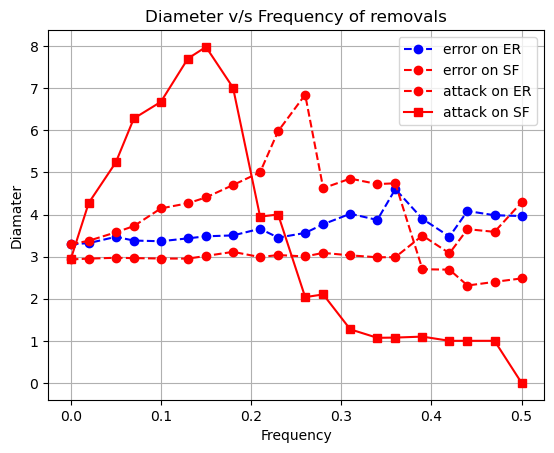

In [10]:
from network_code.plot_functions import plot_of_two_data

fig, ax = plot_of_two_data(freq, d_error_ER, 'error on ER', True, freq, d_error_SF, label2 = 'error on SF', ylabel='Diamater', xlabel='Frequency', title = 'Diameter v/s Frequency of removals')   
ax.plot(freq, d_attack_ER, label = 'attack on ER', color='red', marker='o', linestyle ='--')
ax.plot(freq, d_attack_SF, label = 'attack on SF', color='red', marker='s')
ax.legend()